<a href="https://colab.research.google.com/github/canoztas/CMP682-AI-Final-Project/blob/main/cic2020syscall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_curve, recall_score, roc_curve, precision_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from mlxtend.plotting import plot_confusion_matrix
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.applications import VGG16
from keras.optimizers import Adam
import keras

In [45]:
syscall_data = pd.read_csv("/content/feature_vectors_syscalls_frequency_5_Cat.csv", encoding="utf-8", low_memory=False, na_values="?")

In [46]:
syscall_data["Class"] = syscall_data["Class"].map({1.0: 0, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1})
syscall_data = syscall_data.dropna()

In [47]:
X = syscall_data.drop("Class", axis=1)
y = syscall_data["Class"]

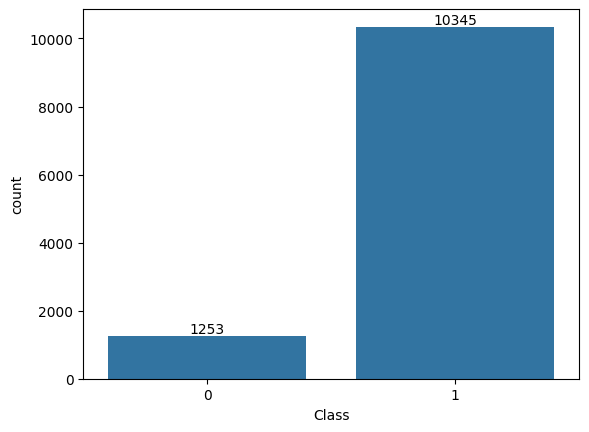

In [48]:
plt.figure()
ax = sns.countplot(data=syscall_data, x="Class")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

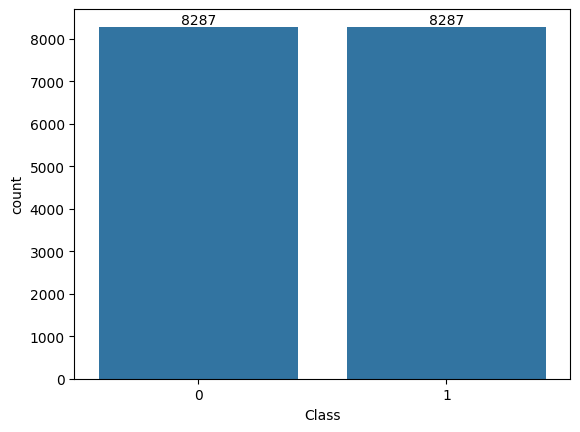

In [50]:
plt.figure()
ax = sns.countplot(x=y_train)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred_train = logreg.predict(X_train)
logreg_pred_test = logreg.predict(X_test)

logreg_train_score = accuracy_score(logreg_pred_train, y_train)
logreg_test_score = accuracy_score(logreg_pred_test, y_test)
print("Logistic Regression Train Score:", logreg_train_score)
print("Logistic Regression Test Score:", logreg_test_score)

Logistic Regression Train Score: 0.6908410763846989
Logistic Regression Test Score: 0.6172413793103448


In [52]:
logreg_precision_score = precision_score(y_test, logreg_pred_test)
logreg_f1_score = f1_score(y_test, logreg_pred_test)
logreg_recall_score = recall_score(y_test, logreg_pred_test)
logreg_accuracy_score = accuracy_score(y_test, logreg_pred_test)

print("Logistic Regression Precision Score:", logreg_precision_score)
print("Logistic Regression F1 Score:", logreg_f1_score)
print("Logistic Regression Recall Score:", logreg_recall_score)
print("Logistic Regression Accuracy Score:", logreg_accuracy_score)

Logistic Regression Precision Score: 0.9425113464447806
Logistic Regression F1 Score: 0.7372781065088758
Logistic Regression Recall Score: 0.6054421768707483
Logistic Regression Accuracy Score: 0.6172413793103448


In [53]:
print(classification_report(y_test, logreg_pred_test))

              precision    recall  f1-score   support

           0       0.19      0.71      0.30       262
           1       0.94      0.61      0.74      2058

    accuracy                           0.62      2320
   macro avg       0.56      0.66      0.52      2320
weighted avg       0.86      0.62      0.69      2320



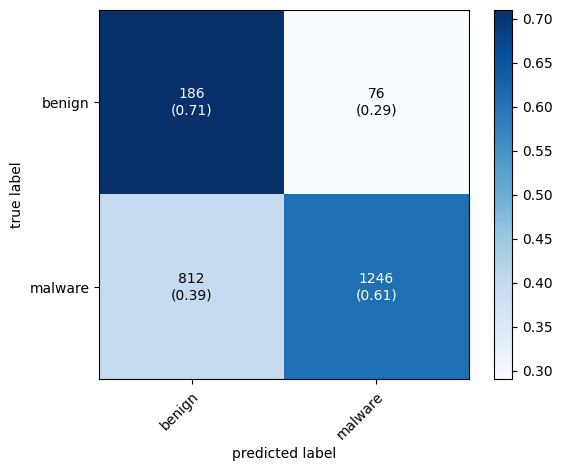

In [54]:
logreg_cm = confusion_matrix(y_test, logreg_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=logreg_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

rf_train_score = accuracy_score(rf_pred_train, y_train)
rf_test_score = accuracy_score(rf_pred_test, y_test)
print("Random Forest Train Score:", rf_train_score)
print("Random Forest Test Score:", rf_test_score)

Random Forest Train Score: 0.9998793290696272
Random Forest Test Score: 0.9724137931034482


In [56]:
rf_precision_score = precision_score(y_test, rf_pred_test)
rf_f1_score = f1_score(y_test, rf_pred_test)
rf_recall_score = recall_score(y_test, rf_pred_test)
rf_accuracy_score = accuracy_score(y_test, rf_pred_test)

print("Random Forest Precision Score:", rf_precision_score)
print("Random Forest F1 Score:", rf_f1_score)
print("Random Forest Recall Score:", rf_recall_score)
print("Random Forest Accuracy Score:", rf_accuracy_score)

Random Forest Precision Score: 0.9765774378585086
Random Forest F1 Score: 0.984578313253012
Random Forest Recall Score: 0.9927113702623906
Random Forest Accuracy Score: 0.9724137931034482


In [57]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       262
           1       0.98      0.99      0.98      2058

    accuracy                           0.97      2320
   macro avg       0.96      0.90      0.93      2320
weighted avg       0.97      0.97      0.97      2320



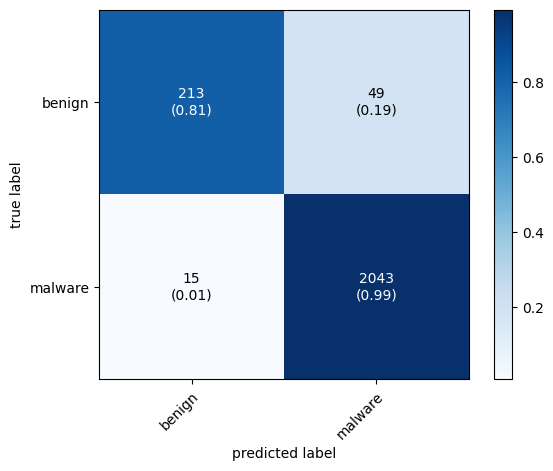

In [58]:
rf_cm = confusion_matrix(y_test, rf_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=rf_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

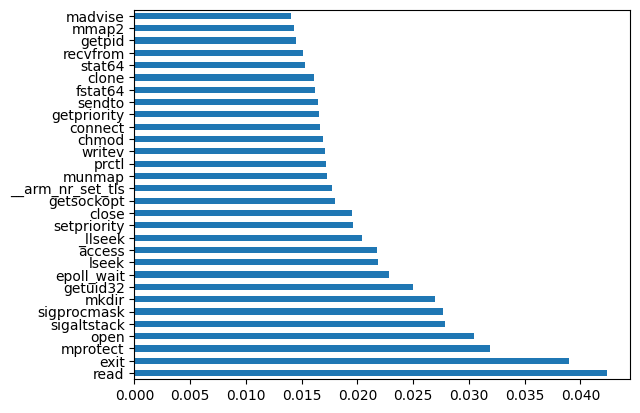

In [59]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [60]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

xgb_train_score = accuracy_score(xgb_pred_train, y_train)
xgb_test_score = accuracy_score(xgb_pred_test, y_test)
print("XGBClassifier Train Score:", xgb_train_score)
print("XGBClassifier Test Score:", xgb_test_score)

XGBClassifier Train Score: 0.9998189936044407
XGBClassifier Test Score: 0.9737068965517242


In [62]:
xgb_precision_score = precision_score(y_test, xgb_pred_test)
xgb_f1_score = f1_score(y_test, xgb_pred_test)
xgb_recall_score = recall_score(y_test, xgb_pred_test)
xgb_accuracy_score = accuracy_score(y_test, xgb_pred_test)

print("XGBClassifier Precision Score:", xgb_precision_score)
print("XGBClassifier F1 Score:", xgb_f1_score)
print("XGBClassifier Recall Score:", xgb_recall_score)
print("XGBClassifier Accuracy Score:", xgb_accuracy_score)

XGBClassifier Precision Score: 0.9854156538648517
XGBClassifier F1 Score: 0.9851761846901581
XGBClassifier Recall Score: 0.9849368318756074
XGBClassifier Accuracy Score: 0.9737068965517242


In [63]:
print(classification_report(y_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       262
           1       0.99      0.98      0.99      2058

    accuracy                           0.97      2320
   macro avg       0.93      0.94      0.93      2320
weighted avg       0.97      0.97      0.97      2320



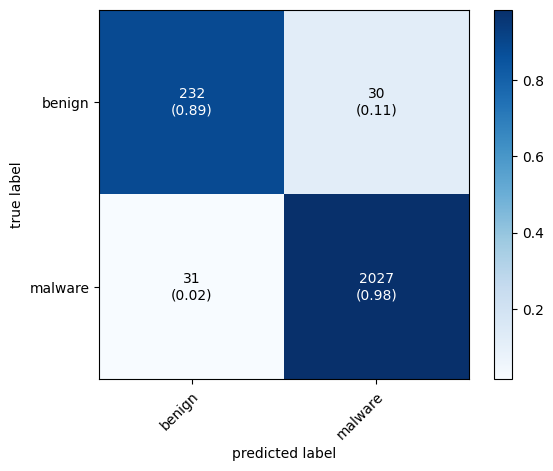

In [64]:
xgb_cm = confusion_matrix(y_test, xgb_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=xgb_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [65]:
# Define the neural network model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=139, activation='relu'))
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
518/518 [==============================] - 5s 7ms/step - loss: 309.8014 - accuracy: 0.5495 - val_loss: 67.9143 - val_accuracy: 0.6082
Epoch 2/50
518/518 [==============================] - 2s 4ms/step - loss: 57.6661 - accuracy: 0.5650 - val_loss: 30.5782 - val_accuracy: 0.3754
Epoch 3/50
518/518 [==============================] - 2s 3ms/step - loss: 33.2727 - accuracy: 0.5615 - val_loss: 28.7686 - val_accuracy: 0.1927
Epoch 4/50
518/518 [==============================] - 2s 3ms/step - loss: 13.9409 - accuracy: 0.5420 - val_loss: 17.3176 - val_accuracy: 0.1569
Epoch 5/50
518/518 [==============================] - 2s 3ms/step - loss: 7.4504 - accuracy: 0.5305 - val_loss: 8.3414 - val_accuracy: 0.1448
Epoch 6/50
518/518 [==============================] - 2s 3ms/step - loss: 7.6451 - accuracy: 0.5290 - val_loss: 5.8792 - val_accuracy: 0.8841
Epoch 7/50
518/518 [==============================] - 2s 4ms/step - loss: 3.6105 - accuracy: 0.5063 - val_loss: 3.3160 - val_accuracy: 0.88

In [66]:
nn_pred_train = model.predict(X_train)
nn_pred_test = model.predict(X_test)

nn_train_score = accuracy_score(nn_pred_train > 0.5, y_train)
nn_test_score = accuracy_score(nn_pred_test > 0.5, y_test)
print("NeuralNetwork Train Score:", nn_train_score)
print("NeuralNetwork Test Score:", nn_test_score)

73/73 [==============================] - 0s 2ms/step
NeuralNetwork Train Score: 0.5
NeuralNetwork Test Score: 0.8870689655172413


In [67]:
nn_precision_score = precision_score(y_test, nn_pred_test > 0.5)
nn_f1_score = f1_score(y_test, nn_pred_test > 0.5)
nn_recall_score = recall_score(y_test, nn_pred_test > 0.5)
nn_accuracy_score = accuracy_score(y_test, nn_pred_test > 0.5)

print("NeuralNetwork Precision Score:", nn_precision_score)
print("NeuralNetwork F1 Score:", nn_f1_score)
print("NeuralNetwork Recall Score:", nn_recall_score)
print("NeuralNetwork Accuracy Score:", nn_accuracy_score)

NeuralNetwork Precision Score: 0.8870689655172413
NeuralNetwork F1 Score: 0.9401553220648697
NeuralNetwork Recall Score: 1.0
NeuralNetwork Accuracy Score: 0.8870689655172413


In [68]:
print(classification_report(y_test, nn_pred_test > 0.5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.89      1.00      0.94      2058

    accuracy                           0.89      2320
   macro avg       0.44      0.50      0.47      2320
weighted avg       0.79      0.89      0.83      2320



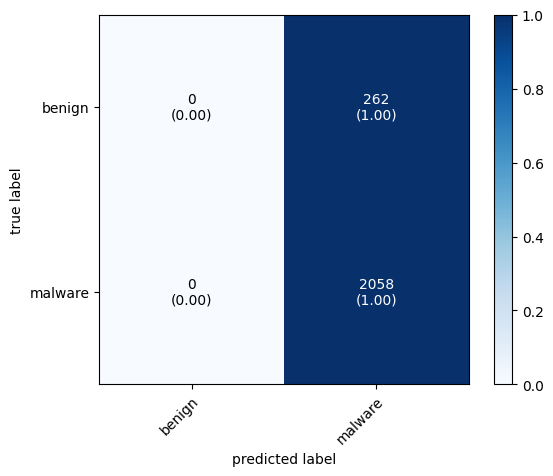

In [69]:
nn_cm = confusion_matrix(y_test, nn_pred_test > 0.5)
fig, ax = plot_confusion_matrix(conf_mat=nn_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [70]:
labels = ["LR", "RF", "XGB", "NN"]
scores = [logreg_test_score,rf_test_score, xgb_test_score,nn_test_score]

In [71]:
def plot_model_plot(labels, scores):
    plt.figure()
    ax = sns.barplot(x=labels, y=scores)
    ax.set_title("Trained Models Accuracy")
    for container in ax.containers:
        ax.bar_label(container)

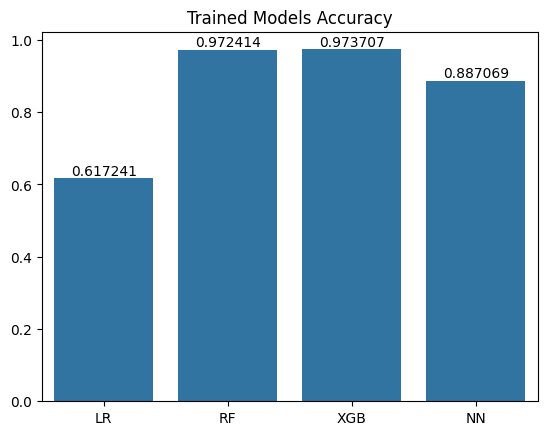

In [72]:
plot_model_plot(labels, scores)
plt.show()

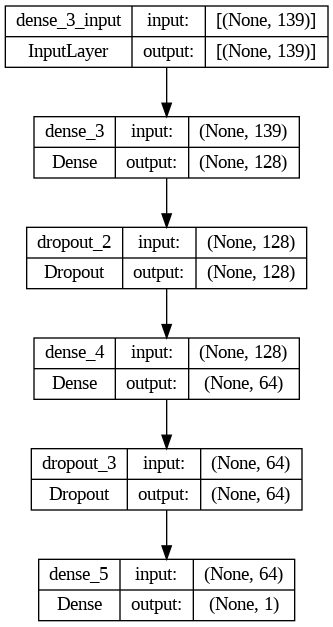

In [73]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [74]:
# Save the entire model to a HDF5 file
model.save('apk_analyzer_model.h5')